In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

In [2]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [4,5]

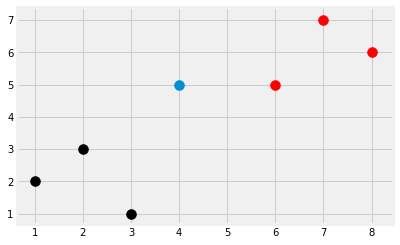

In [3]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

In [4]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )
            #euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])     
    votes = [i[1] for i in sorted(distances)[:k]]#most near k point
    vote_result = Counter(votes).most_common(1)[0][0]# count fre get big one#[('r', 3)]
    return vote_result

In [5]:
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


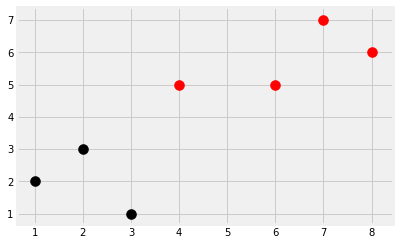

In [6]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

In [1]:
import numpy as np
import warnings
from collections import Counter
import pandas as pd
import random

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

In [7]:
full_data = df.astype(float).values.tolist()

In [8]:
random.shuffle(full_data)

In [10]:
test_size = 0.2 # test_size = 0.4 accur up
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [11]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [13]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9856115107913669


In [7]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    print(votes)
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k # most vote times / k
    print(Counter(votes).most_common(1))
    return vote_result, confidence

In [8]:
result = k_nearest_neighbors(dataset, new_features)
print(result)#3/3

['r', 'k', 'r']
[('r', 2)]
('r', 0.6666666666666666)
